In [1]:
import numpy as np
from numpy import array
import pandas as pd
from datetime import datetime,timedelta,date

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import yfinance as yf

In [4]:
#it gives data for last calnder year only :-(
data = yf.download("BTC-USD", start="2020-01-01", end="2020-12-25")
data.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664996
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465


In [121]:
path = 'D:/NLP COURSE/BitCoin/BTC_USD_2013-10-01_2021-01-23-CoinDesk.csv'

#load data - downloaded from https://www.coindesk.com/price/bitcoin till 2013 till 23 Jan 2021
data = pd.read_csv(path)

In [122]:
data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [123]:
data.tail()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2656,BTC,2021-01-19,36346.609502,35847.833425,37440.404012,34816.289250
2657,BTC,2021-01-20,36577.519646,36639.985912,37876.158929,36136.535574
2658,BTC,2021-01-21,35004.532627,35909.432247,36409.708596,33430.821992
2659,BTC,2021-01-22,30606.182676,35491.423921,35612.737198,30077.278955
2660,BTC,2021-01-23,33368.365932,30844.833152,33873.772988,28845.311480


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2661 non-null   object 
 1   Date                 2661 non-null   object 
 2   Closing Price (USD)  2661 non-null   float64
 3   24h Open (USD)       2661 non-null   float64
 4   24h High (USD)       2661 non-null   float64
 5   24h Low (USD)        2661 non-null   float64
dtypes: float64(4), object(2)
memory usage: 124.9+ KB


In [125]:
#Convert it to datetime from object
data['Date']= pd.to_datetime(data.Date)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Currency             2661 non-null   object        
 1   Date                 2661 non-null   datetime64[ns]
 2   Closing Price (USD)  2661 non-null   float64       
 3   24h Open (USD)       2661 non-null   float64       
 4   24h High (USD)       2661 non-null   float64       
 5   24h Low (USD)        2661 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 124.9+ KB


C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


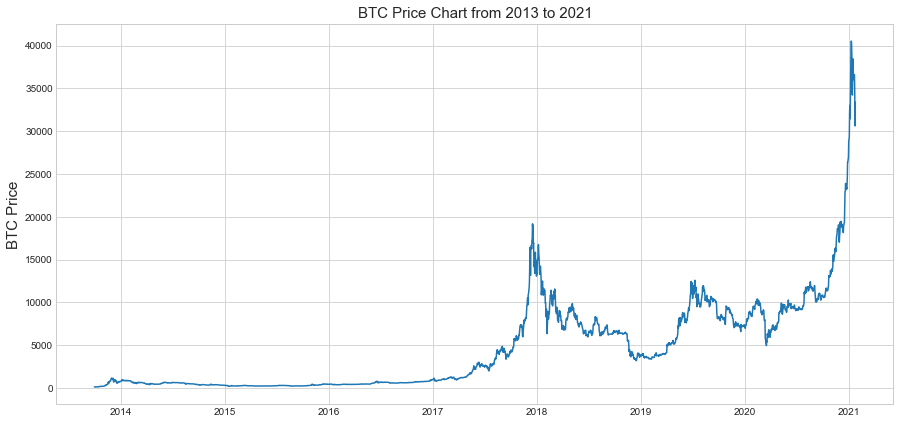

In [127]:
# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(data['Date'],data['Closing Price (USD)'])
plt.ylabel('BTC Price', fontsize=15)
plt.title('BTC Price Chart from 2013 to 2021', fontsize=15)
plt.show()

#on 2013-10-01, price was $123 and in 7 years its grown to$33,368 !!! 

Text(0.5, 1.0, 'BTC Returns Volatility')

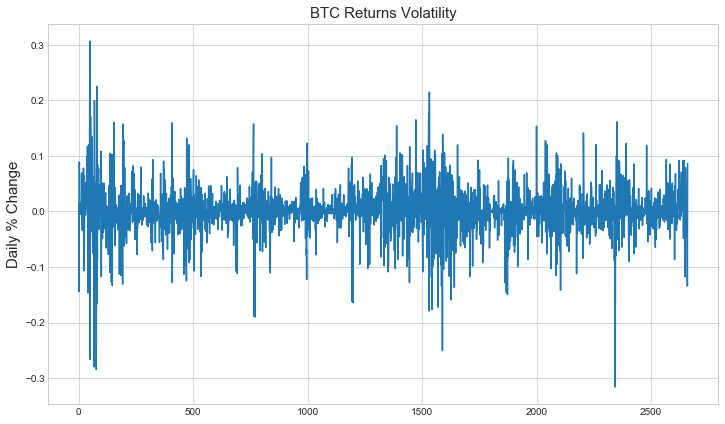

In [152]:
#get time sequenced delta returns
returns = np.log(1+data['Closing Price (USD)'].pct_change().dropna())

#Plot the tiem delta to see the volatility - it seems very high!
plt.figure(figsize=(12,7))
plt.plot(returns)
plt.ylabel('Daily % Change', fontsize=15)
plt.title('BTC Returns Volatility', fontsize=15)

In [156]:
#lets calculate the mean mu and SD as sigma
mu, sigma = returns.mean(), returns.std()

print(mu *100, sigma*100)

0.21044617493879803 4.285016745958831


In [158]:
#take the latest price in the downloaded data dated 23 Jab 2021
Last_price = data['Closing Price (USD)'].iloc[-1]

print(Last_price)

33368.3659318948


In [159]:
#Generate 252 random values from normal distribution for given mu and sigma  
ONE_YR = 252
sim_returns = np.random.normal(mu,sigma,ONE_YR)

In [160]:
#Calculate the price as P = Last Price x (1+r1)(1+r2).....(1+r252) 
sim_price = Last_price*(1+sim_returns).cumprod()

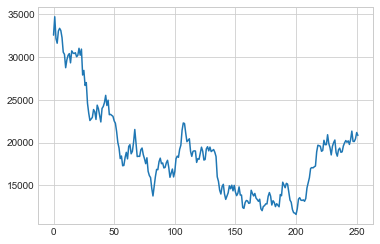

In [161]:
#lest plot for a one year returns
plt.plot(sim_price)

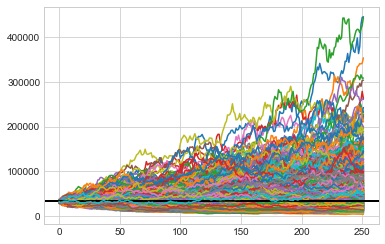

In [184]:
#now run the simulation over multiple time

sim = []
iterations = 1000

for i in range(iterations):
    sim_returns = np.random.normal(mu,sigma,ONE_YR)
    sim_price = Last_price*(1+sim_returns).cumprod() 
    sim.append(sim_price)
    plt.axhline(Last_price,c='k')
    plt.plot(sim_price)    

In [185]:
print("Mean: ", np.mean(sim) ) 
print("SD: ",np.std(sim) )
print("Max: ",np.max(sim) )
print("Min: ", np.min(sim) )

Mean:  43943.278599392674
SD:  26182.13760510031
Max:  444583.6016031488
Min:  4425.823940981969


In [187]:
#Closing Price (USD)	24h Open (USD)	24h High (USD)	24h Low (USD)
data['14D-L'] = data['24h Low (USD)'].rolling(14).min()
data['14D-H'] = data['24h High (USD)'].rolling(14).max()
data['%K'] = 100*(data['Closing Price (USD)'] - data['14D-L'])/(data['14D-H']-data['14D-L'])
data['%D'] = data['%K'].rolling(3).min()

data.head(2)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),daily_returns,14D-L,14D-H,%K,%D
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349,NaN,NaN,NaN,NaN,NaN
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383,1.455671,NaN,NaN,NaN,NaN


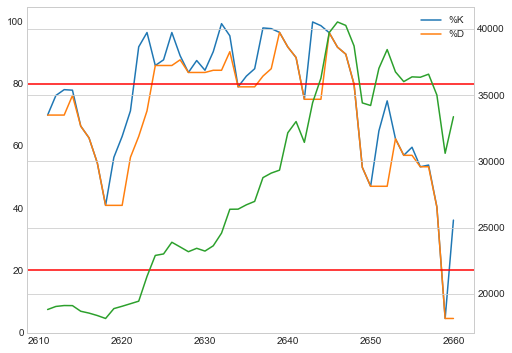

In [219]:
no_of_days = 50

#plt.figure(figsize=(50,50))
ax = data[['%K','%D']].tail(no_of_days).plot()
data['Closing Price (USD)'].tail(no_of_days).plot(ax=ax,secondary_y=True)
ax.axhline(20,linestyle='-', color='r')
ax.axhline(80,linestyle='-', color='r')
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [224]:
data['Closing Price (USD)'].tail(20)

2641    33002.536427
2642    31431.612280
2643    34433.606514
2644    36275.756348
2645    39713.507857
2646    40519.448598
2647    40258.923989
2648    38709.765375
2649    34409.642375
2650    34214.610262
2651    37017.007503
2652    38435.863515
2653    36751.584974
2654    36016.779606
2655    36375.811379
2656    36346.609502
2657    36577.519646
2658    35004.532627
2659    30606.182676
2660    33368.365932
Name: Closing Price (USD), dtype: float64